In [43]:
import pandas as pd
import numpy as np

from scipy.stats import truncnorm 

In [69]:
train_data = pd.read_csv('mnist_train.csv', delimiter=',')
test_data = pd.read_csv('mnist_test.csv', delimiter=',')

In [70]:
class BoltzamannMachine:
    
    def __init__ ( self , nodes , hidden_nodes , out_nodes , learning_rate ):
        self.nodes = nodes
        self.hidden_nodes = hidden_nodes
        self.out_nodes = out_nodes
        self.learning_rate = learning_rate

        self.weight_matrix()
        self.LogErr = 0
        self.MSE = 0
        
    def weight_matrix(self):
    
        #set input-hidden matrix
        var = 1/np.sqrt(self.nodes)
        M = truncnorm(-var, var, loc = 0, scale = 1)
        self.Input_Hidden = M.rvs((self.hidden_nodes, self.nodes))
        
        #set hidden-output matrix
        var = 1/np.sqrt(self.hidden_nodes)
        M = truncnorm (-var, var, loc = 0, scale = 1)
        self.Hidden_Output = M.rvs((self.out_nodes, self.hidden_nodes))
        
    def train(self, input_, target, n):
        
        input_ = np.array(input_, ndmin = 2).T
        target = np.array(target, ndmin = 2).T

        sigma1 = sigma(np.dot(self.Input_Hidden, input_))
        sigma2 = sigma(np.dot(self.Hidden_Output, target)) #output
        
        #estimate errors
        err = target - sigma2        
        self.MSE =(1/n) * (((sigma2 - target)**2).sum())
        self.LogErr = -(target * np.log(sigma2) + (np.repeat(1, n) - target) * np.log(np.repeat(1, n) - sigma2)).sum()
        
        #updating hidden-output matrix
        delta = err * dsigmaapprox(sigma2)
        self.Hidden_Output += self.learning_rate * np.dot(delta , sigma1.T)
        
        #updating input-hidden matrix
        err_hidden = np.dot(self.Hidden_Output.T, err)
        delta = err_hidden * dsigmaapprox(sigma1)
        self.Input_Hidden += self.learning_rate * np.dot(delta, input_.T)
        
    #calcola di nuovo la rete       
    def Pensa(self, input_):
        input_ = np.array(input_).T
        vettore_out = sigma(np.dot(self.Input_Hidden, input_))
        out = sigma(np.dot(self.Hidden_Output, vettore_out))
        return out

In [67]:
def dsigmaapprox (x):
    return x *(1 - x)

def sigma (x):
    return 1/(1+ np.exp(-x))

----------------------------
----------------------------
----------------------------
----------------------------
----------------------------
----------------------------
----------------------------
----------------------------
----------------------------
----------------------------
----------------------00----
--------------------0000----
----------------00000000----
-------------00000000000----
----------000000000000------
-------000000000------------
----0000000000--------------
----000000------------------
----00----------------------
----------------------------
----------------------------
----------------------------
----------------------------
----------------------------
----------------------------
----------------------------
----------------------------
----------------------------


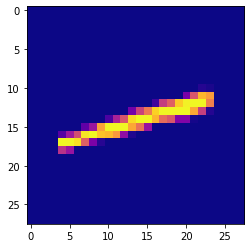

In [76]:
ind = 2
x = np.asfarray(test_data)/255
num = x[ind, 1:]
num = [num[i::28] for i in range(28)]

for i in range(28):
    for j in range(28):
        if j == 27:
            if num[i][j]==0:
                print("-")
            else: print(0)
        else:    
            if num[i][j]==0:
                print("-", end = '')
            else: print(0, end = '')

from matplotlib import pyplot

pyplot.imshow(num, cmap=pyplot.get_cmap('plasma'))
pyplot.show()

In [72]:
prova = BoltzamannMachine( nodes = 3 ,
             hidden_nodes = 3,
             out_nodes =3 ,
             learning_rate = 0.1)
prova.train([1,2,3],[1,2,3],3)